In [1]:
# Import the required libraries and dependencies including
# Pandas, pathlib and %matplotlib inline
import pandas as pd
from pathlib import Path
%matplotlib inline


In [3]:
# Read in the CSV file called "bitcoin_1.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
bitcoin_1 = pd.read_csv(
    Path('/Users/michaeldionne/Desktop/GitHub/_Fintech-Workspace/Module 3-Financial Analysis with Pandas/Readings/03-Bitcoin_Month_Week_Day/Resources/bitcoin_1.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

# Review the first 5 rows of the 'bitcoin_1' DataFrame
bitcoin_1.head()


,Close
Timestamp,
2015-01-01 00:00:00,314.0
2015-01-01 00:01:00,314.0
2015-01-01 00:02:00,314.0
2015-01-01 00:03:00,314.0
2015-01-01 00:04:00,313.9


In [4]:
# Read in the CSV file called "bitcoin_2.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
bitcoin_2 = pd.read_csv(
    Path('/Users/michaeldionne/Desktop/GitHub/_Fintech-Workspace/Module 3-Financial Analysis with Pandas/Readings/03-Bitcoin_Month_Week_Day/Resources/bitcoin_2.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

# Review the first 5 rows of the 'bitcoin_2' DataFrame
bitcoin_2.head()


,Close
Timestamp,
2015-01-07 20:24:00,360.00
2015-01-07 20:27:00,276.34
2015-01-07 20:28:00,271.60
2015-01-07 20:29:00,344.67
2015-01-07 20:30:00,305.38


<AxesSubplot:title={'center':'October 19, 2015'}, xlabel='Timestamp'>

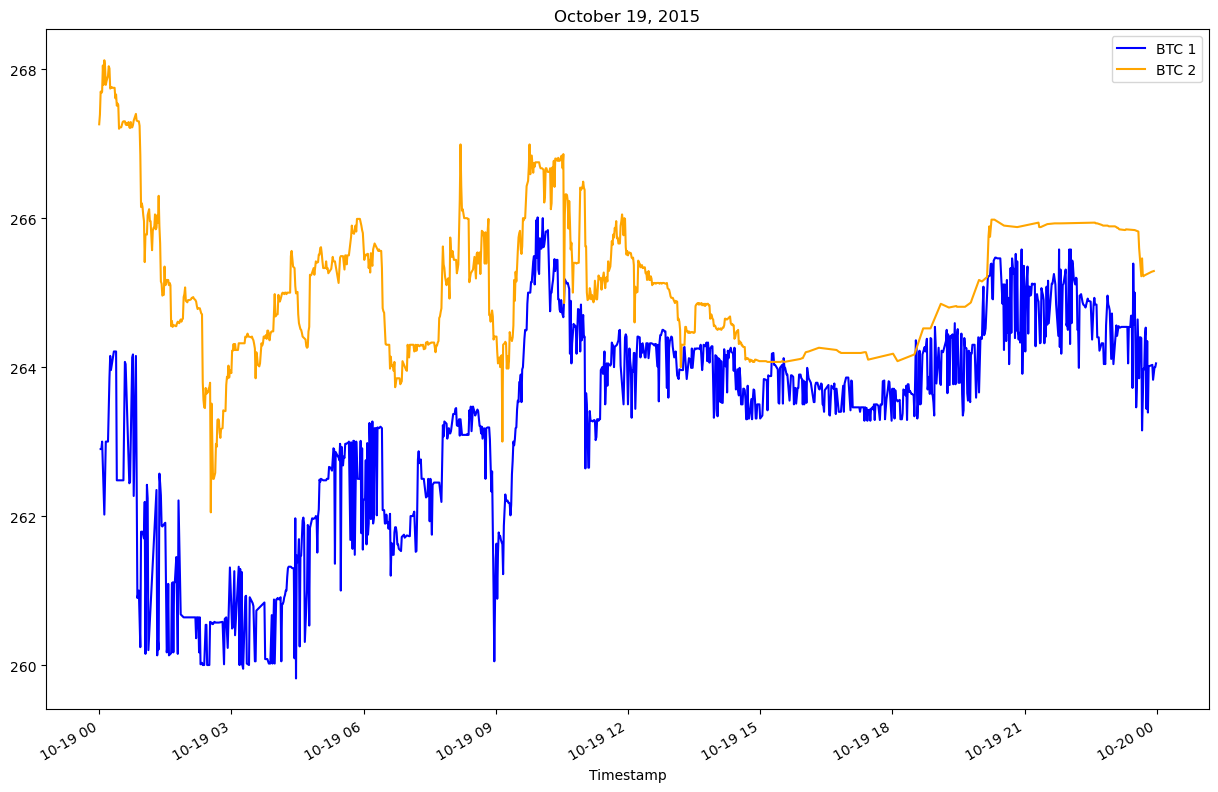

In [6]:
# Overlay the plot of the Bitcoin 'Close' data
bitcoin_1['Close'].loc['2015-10-19'].plot(
    legend=True, figsize=(15, 10), title="October 19, 2015", color="blue", label="BTC 1")
bitcoin_2['Close'].loc['2015-10-19'].plot(
    legend=True, figsize=(15, 10), color="orange", label="BTC 2")


In the plot, the difference between the lower-priced bitcoin_1 (blue) and the higher-priced bitcoin_2 (orange) is the spread. We make a profit when we simultaneously buy at the lower price and sell at the higher one.

In [7]:
#summary statistics for the spread between the two prices over the course of the day
arbitrage_spread = bitcoin_2['Close'].loc['2015-10-19'] - bitcoin_1['Close'].loc['2015-10-19']
arbitrage_spread.describe()


count    666.000000
mean       2.105991
std        1.334641
min       -0.120000
25%        0.990000
50%        1.905000
75%        3.052500
max        6.610000
Name: Close, dtype: float64

The key measurements are the total count, mean, and minimum and maximum values. Now, we know that 666 data points exist, that the average difference between the two prices is $2.10, and that the maximum difference is $6.61. The minimum value, -0.12, tells us that a time existed when bitcoin_1 had a higher price than bitcoin_2.

In [8]:
# Use the arbitrage_spread to determine the return percentage of the trades with a positive spread
# Include only the trades that have an arbitrage_spread that’s greater than 0
# Use the bitcoin_1 prices from the day as the denominator

spread_return = arbitrage_spread[arbitrage_spread>0] / bitcoin_1['Close'].loc['2015-10-19']

# Create a profitable_trades DataFrame
# Show only those trades where the spread_return is greater than 1% (.01)
profitable_trades = spread_return[spread_return > .01]
profitable_trades.head(10)

# Print the summary statistics for the profitable_trades DataFrame
profitable_trades.describe()


count    208.000000
mean       0.014413
std        0.002982
min        0.010044
25%        0.011969
50%        0.013963
75%        0.016431
max        0.025400
Name: Close, dtype: float64

Now, the DataFrame shows only those returns that exceed the transaction cost threshold of 1%. The resulting summary statistics reveal that the total number of possible price points has decreased from 666 to 208 and that the average return (the mean value) is 1.44% Not great, but not horrible.

In [9]:
# calculate the profits in dollars
profit = profitable_trades * bitcoin_1['Close'].loc['2015-10-19']
profit


Timestamp
2015-10-19 00:02:00    4.80
2015-10-19 00:03:00    4.78
2015-10-19 00:04:00    4.70
2015-10-19 00:07:00    6.10
2015-10-19 00:09:00    4.79
                       ... 
2015-10-19 23:54:00     NaN
2015-10-19 23:55:00     NaN
2015-10-19 23:57:00     NaN
2015-10-19 23:58:00     NaN
2015-10-19 23:59:00     NaN
Name: Close, Length: 1083, dtype: float64

Besides the profit per time period, this DataFrame also shows some NaN values. “NaN” displays for time periods when the spread return is less than 1%. Therefore, no value exists by which to multiply the bitcoin_1 price.

In [10]:
# drop null values
profit_per_trade = profit.dropna()
profit_per_trade.describe()



count    208.000000
mean       3.767500
std        0.772626
min        2.630000
25%        3.135000
50%        3.645000
75%        4.282500
max        6.610000
Name: Close, dtype: float64

Note that the average profit per arbitrage trade is $3.76 with a minimum value of $2.63 and a maximum value of $6.61.

In [11]:
#profit sum
profit_sum = profit_per_trade.sum()
profit_sum


783.6400000000015

This means that the potential to make $783.64 existed on a single day by arbitraging one share of Bitcoin between the two exchanges. This assumes that each trade was distinct from every other trade and that no profits were reinvested in buying more Bitcoin.

<AxesSubplot:title={'center':'Bitcoin Profits'}, xlabel='Timestamp'>

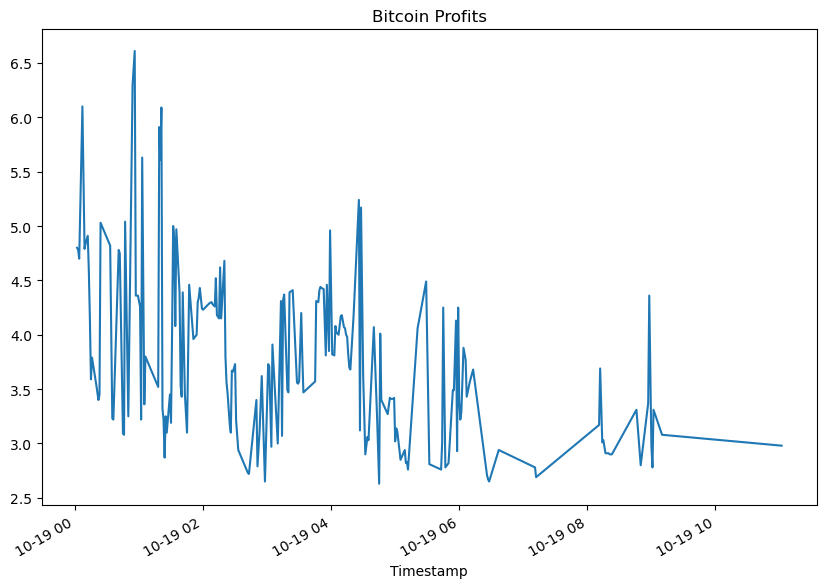

In [12]:
profit_per_trade.plot(figsize=(10, 7), title="Bitcoin Profits")


Our plot confirms that most of the profits were generated early in the day, which is consistent with our initial daily plot that illustrated the spread between prices. 

We can also view the cumulative profit_per_trade data over the day. To do this, we’ll use a new Pandas function: cumsum, which stands for cumulative sum.

IMPORTANT
The cumsum function proves especially useful in financial analysis when you’re routinely calculating and visualizing the progress of an investment over time.





<AxesSubplot:title={'center':'Cumulative Bitcoin Profits'}, xlabel='Timestamp'>

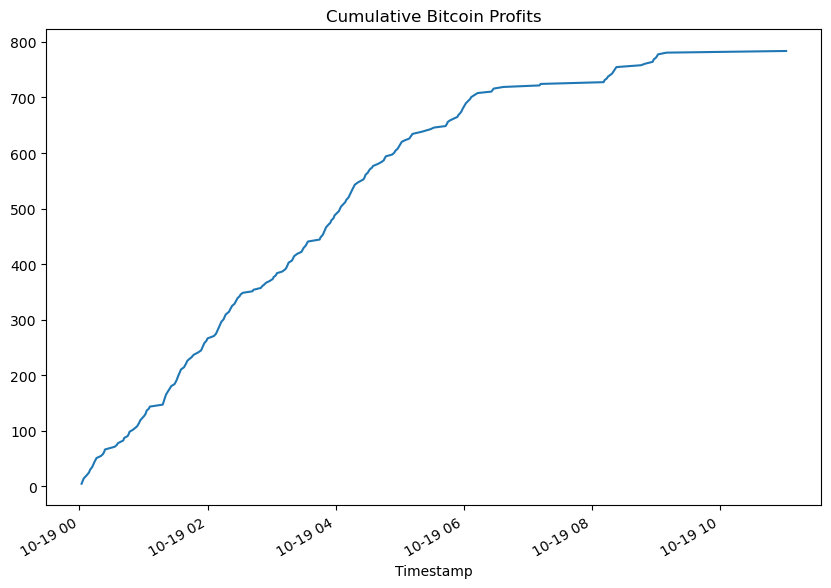

In [13]:
cumulative_profit = profit_per_trade.cumsum()
cumulative_profit.plot(figsize=(10, 7), title="Cumulative Bitcoin Profits")


### Arbitrage Analysis Conclusion
A profit of $783.64 isn’t a bad return for a day’s trading. Of course, this example is a simplified version of an arbitrage situation that we analyzed in hindsight. In reality, arbitrage situations rarely occur, and when they do, they don’t last long.

The Bitcoin markets of 2015 and 2016 attracted plenty of attention from arbitrageurs. The more arbitrageurs that play in the market, the less profits remain to go around. When more people buy in the cheaper exchange, the price goes up. By contrast, more people selling in the more expensive exchange drives the price down. The potential for arbitrage profits attracts new traders to the market, which eventually causes these profits to shrink and, in some cases, disappear. In the next section, we’ll dive more deeply into both the Bitcoin arbitrage situation and the state of arbitrage today.